In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from fakespikes.rates import random_boxcars, bursts, boxcar
from fakespikes.util import create_times

from pykdf.kdf import save_kdf, load_kdf
import numpy as np
from pprint import pprint

from foof.util import create_psd
from fakespikes.util import create_times
from bluemass.model import run
from pykdf.kdf import save_kdf, load_kdf
from fakespikes.rates import bursts, constant
from fakespikes.neurons import Spikes
import fakespikes.util as sp



import seaborn as sns
sns.set_style('ticks')


# Examples

## Intro cartoons

In [27]:
t = 500e-3
dt = 1e-3
times = create_times(t, dt)

s = .5
noi = np.random.normal(0, s, size=times.shape[0])

f = 10
r = 1
ro = 2
n = 1
l = 11.7e-3
n_bursts = 2
stim = boxcar(times, r, 2, l, dt, offset=200e-3) + ro

re = stim + noi

m_post = np.logical_and(times > 0.39, times < 0.42)
m_pre = np.logical_and(times > 0.36, times < 0.39)

(0.15, 0.35)

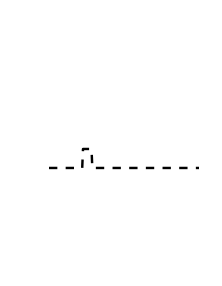

In [28]:
# One perfect stim
plt.figure(figsize=(2, 10))
plt.subplot(311)
plt.plot(times, stim, 'k', linestyle='--')
# plt.plot(times, re, 'k', alpha=0.2)
plt.axis('off')
plt.ylim(-2, 10)
plt.xlim(.15, 0.35)

In [29]:
# Three stim
stim += boxcar(times, r*2, 2, l, dt, offset=250e-3) 
stim += boxcar(times, r*3, 2, l, dt, offset=300e-3) 

(0.15, 0.35)

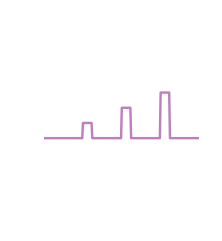

In [30]:
plt.figure(figsize=(2, 8))
plt.subplot(311)
plt.plot(times, stim, 'purple', alpha=0.5)
# plt.plot(times, re, 'k', alpha=0.2)
plt.axis('off')
plt.ylim(-2, 10)
plt.xlim(.15, 0.35)

In [31]:
t = 500e-3
dt = 1e-3
times = create_times(t, dt)

s = 3
noi = np.random.normal(0, s, size=times.shape[0])

f = 10
r = 14
ro = 2
n = 1
l = 11.7e-3
n_bursts = 2
stim = boxcar(times, r, 2, l, dt, offset=400e-3) + ro


re = stim + noi

m_post = np.logical_and(times > 0.39, times < 0.42)
m_pre = np.logical_and(times > 0.1, times < 0.35)

(0.10000000000000001, 0.5, -10.0, 25.0)

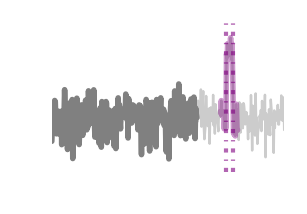

In [32]:
# Zooooooom 
plt.figure(figsize=(3, 2))
plt.plot(times, re, 'k', alpha=0.2)
plt.plot(times[m_pre], re[m_pre], 'grey', linewidth=4)
plt.plot(times[m_post], re[m_post], 'purple', linewidth=4, alpha=0.4)
plt.axvline(x=0.4, color='purple', alpha=0.6, linewidth=3, linestyle='-.')
plt.axvline(x=0.412, color='purple', alpha=0.6, linewidth=3, linestyle='-.')

plt.xlim(0.1, 0.5)
plt.axis('off')

## Model examples

### Random phase

In [33]:
%run /home/ejp/src/bluemass/bm.py ../data/fig4/ ../pars/fig4/mathewson_constant_osc_r72.2222222222.yaml -t 0.5 --sigma 3 --loc r_E
res1 = load_kdf("../data/fig4/result.hdf5")
idx1 = load_kdf("../data/fig4/index.hdf5")

%run /home/ejp/src/bluemass/bm.py ../data/fig4/ ../pars/fig4/mathewson_constant_osc_r72.2222222222.yaml -t 0.5 --sigma 3 --loc r_E
res2 = load_kdf("../data/fig4/result.hdf5")
idx2 = load_kdf("../data/fig4/index.hdf5")

%run /home/ejp/src/bluemass/bm.py ../data/fig4/ ../pars/fig4/mathewson_constant_osc_r72.2222222222.yaml -t 0.5 --sigma 3 --loc r_E
res3 = load_kdf("../data/fig4/result.hdf5")
idx3 = load_kdf("../data/fig4/index.hdf5")

%run /home/ejp/src/bluemass/bm.py ../data/fig4/ ../pars/fig4/mathewson_constant_osc_r72.2222222222.yaml -t 0.5 --sigma 3 --loc r_E
res4 = load_kdf("../data/fig4/result.hdf5")
idx4 = load_kdf("../data/fig4/index.hdf5")

In [34]:
times = res1['times']
stim = res1['stims'][:,0]

ys1 = res1['ys']
ys2 = res2['ys']
ys3 = res3['ys']
ys4 = res4['ys']

re1 = ys1[:, idx1['r_E']]
re2 = ys2[:, idx2['r_E']]
re3 = ys3[:, idx3['r_E']]
re4 = ys4[:, idx4['r_E']]

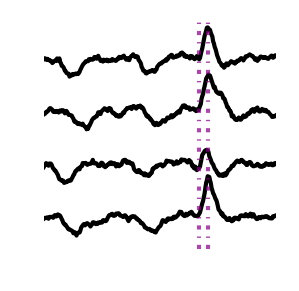

In [35]:
plt.figure(figsize=(3, 3))
plt.plot(times, re1, color='k', linewidth=3)
plt.plot(times, re2+5, color='k', linewidth=3)
plt.plot(times, re3+10, color='k', linewidth=3)
plt.plot(times, re4+15, color='k', linewidth=3)
plt.axis('off')
plt.ylim(3, 25)
plt.xlim(0.2, 0.5)
plt.axvline(x=0.4, color='purple', alpha=0.7, linewidth=3, linestyle='-.')
plt.axvline(x=0.412, color='purple', alpha=0.7, linewidth=3, linestyle='-.')

(0.20000000000000001, 0.5, 0.0, 4.0999999999999996)

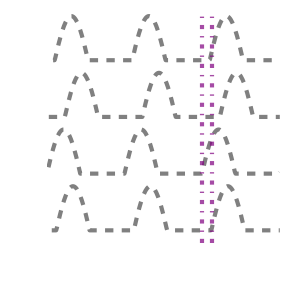

In [36]:
plt.figure(figsize=(3, 3))
plt.plot(times, res1['rates'][:, 0] / res1['rates'][:, 0].max() + 0, 'grey', linewidth=3, linestyle='--')
plt.plot(times, res2['rates'][:, 0] / res2['rates'][:, 0].max() + 1, 'grey', linewidth=3, linestyle='--')
plt.plot(times, res3['rates'][:, 0] / res3['rates'][:, 0].max() + 2, 'grey', linewidth=3, linestyle='--')
plt.plot(times, res4['rates'][:, 0] / res4['rates'][:, 0].max() + 3, 'grey', linewidth=3, linestyle='--')
plt.axvline(x=0.4, color='purple', alpha=0.7, linewidth=3, linestyle='-.')
plt.axvline(x=0.412, color='purple', alpha=0.7, linewidth=3, linestyle='-.')
plt.xlim(0.2, 0.5)
plt.ylim(0, 4.1)
plt.axis('off')

### Locked burst

In [37]:
%run /home/ejp/src/bluemass/bm.py ../data/fig4/ ../pars/fig4/mathewson_lockedburst_osc_r72.2222222222.yaml -t 0.7 --sigma 1 --loc r_E
res = load_kdf("../data/fig4/result.hdf5")
idx = load_kdf("../data/fig4/index.hdf5")

In [38]:
times = res['times']
stim = res['stims'][:,0]
ys = res['ys']
re = ys[:, idx['r_E']]
rates = res['rates'][:, 0] / res['rates'][:, 0].max()

(0.10000000000000001, 0.90000000000000002, 3.0, 10.0)

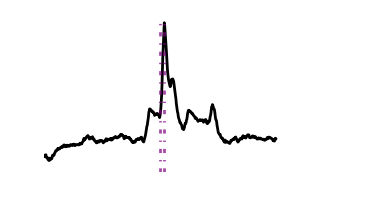

In [39]:
plt.figure(figsize=(4, 2))
plt.plot(times, re, color='k', linewidth=2)
plt.axvline(x=0.4, color='purple', alpha=0.7, linewidth=2, linestyle='-.')
plt.axvline(x=0.412, color='purple', alpha=0.7, linewidth=2, linestyle='-.')
plt.xlim(0.1, 0.9)
plt.ylim(3, 10)
plt.axis('off')

(0.10000000000000001, 0.90000000000000002, 0.0, 1.1000000000000001)

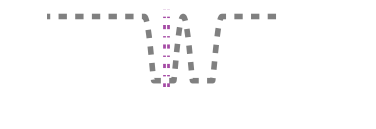

In [40]:
plt.figure(figsize=(4, 1))
plt.plot(times, rates,'grey', linewidth=4, linestyle='--')
plt.axvline(x=0.4, color='purple', alpha=0.7, linewidth=2, linestyle='-.')
plt.axvline(x=0.412, color='purple', alpha=0.7, linewidth=2, linestyle='-.')
plt.xlim(0.1, 0.9)
plt.ylim(0, 1.1)
plt.axis('off')

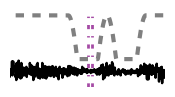

In [41]:
nrns_e = Spikes(125, 1, dt=1e-3, seed=42)
nrns_i = Spikes(125, 1, dt=1e-3, seed=42+1)

times = nrns_e.times
r = 125
r_osc = bursts(times, r, 10, 2, min_a=12, offset=0.35)

o_e = nrns_e.poisson(r_osc).sum(1)
o_i = nrns_i.poisson(r_osc).sum(1)

plt.figure(figsize=(2, 1))
plt.plot(times, o_e-o_i, color='k')
# plt.ylim(-120, 120)
plt.xlim(0.2, 0.6)
plt.axvline(x=0.4, color='purple', alpha=0.7, linewidth=2, linestyle='-.')
plt.axvline(x=0.412, color='purple', alpha=0.7, linewidth=2, linestyle='-.')
plt.plot(times, r_osc/2 + 10, 'grey', linewidth=3, linestyle='--')
sub = plt.subplot(111)
sub.set_frame_on(False)
sub.get_yaxis().set_visible(False)
sub.get_xaxis().set_visible(False)

# Results

## Phase experiments

In [42]:
a1 = load_kdf("../data/fig4/a_part1.hdf5")
# a2 = load_kdf("../data/fig4/a_part2.hdf5")
a3 = load_kdf("../data/fig4/a_part3.hdf5")
a4 = load_kdf("../data/fig4/a_part4.hdf5")
# a5 = load_kdf("../data/fig4/a_part5.hdf5")
a6 = load_kdf("../data/fig4/a_part6.hdf5")

b1 = load_kdf("../data/fig4/b_part1.hdf5")
# b2 = load_kdf("../data/fig4/b_part2.hdf5")
b3 = load_kdf("../data/fig4/b_part3.hdf5")
b4 = load_kdf("../data/fig4/b_part4.hdf5")
# # b5 = load_kdf("../data/fig4/b_part5.hdf5")
b6 = load_kdf("../data/fig4/b_part6.hdf5")

In [43]:
pprint(a3.keys())
pprint(a3['hits'].shape)

[u'n_stim',
 u'hits',
 u'stims',
 u'd_primes',
 u'misses',
 u'rates',
 u'false_alarms',
 u'correct_rejections']
(360, 10)


## 2 SD threshold

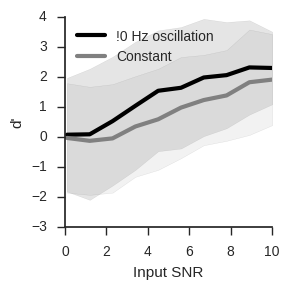

In [44]:
plt.figure(figsize=(3, 3))

r = a3['rates'] / 10.0  # 10 Hz is the noise level
M = a3['d_primes'].mean(0)
SD = a3['d_primes'].std(0)
plt.plot(r, M, color='k', linewidth=3, label='!0 Hz oscillation')
plt.fill_between(r, M+SD, M-SD, facecolor='black', alpha=0.1)

r = a6['rates'] / 10
M = a6['d_primes'].mean(0)
SD = a6['d_primes'].std(0)
plt.plot(r, M, color='grey', linewidth=3,  label="Constant")
plt.fill_between(r, M+SD, M-SD, facecolor='grey', alpha=0.1)

plt.xlabel("Input SNR")
plt.ylim(-3, 4)
plt.ylabel("d'")
plt.legend(loc='upper left', fancybox=True, framealpha=0.5)
plt.tight_layout()
sns.despine()

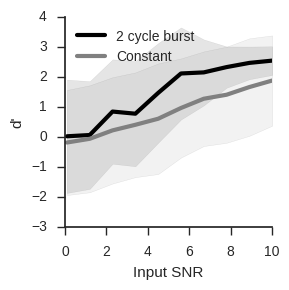

In [45]:
plt.figure(figsize=(3, 3))

r = b3['rates'] / 10.0  # 10 Hz is the noise level
M = b3['d_primes'].mean(0)
SD = b3['d_primes'].std(0)
plt.plot(r, M, color='black', linewidth=3, label='2 cycle burst')
plt.fill_between(r, M+SD, M-SD, facecolor='black', alpha=0.1)

r = b6['rates'] / 10.0
M = b6['d_primes'].mean(0)
SD = b6['d_primes'].std(0)
plt.plot(r, M, color='grey', linewidth=3, label="Constant")
plt.fill_between(r, M+SD, M-SD, facecolor='grey', alpha=0.1)

plt.xlabel("Input SNR")
plt.ylim(-3, 4)
plt.ylabel("d'")
plt.legend(loc='upper left', fancybox=True, framealpha=0.1)
plt.tight_layout()
sns.despine()

## 1 SD threshold

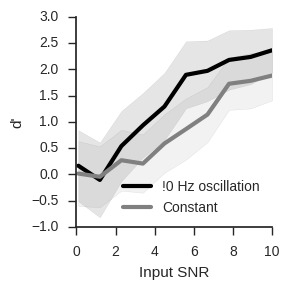

In [46]:
plt.figure(figsize=(3, 3))

# osc
r = a1['rates'] / 10.0  # 10 Hz is the noise level
M = a1['d_primes'].mean(0)
SD = a1['d_primes'].std(0)
SEM = SD / np.sqrt(len(SD))
plt.plot(r, M, color='k', linewidth=3, label='!0 Hz oscillation')
plt.fill_between(r, M+SEM, M-SEM, facecolor='black', alpha=0.1)

# const
r = a4['rates'] / 10
M = a4['d_primes'].mean(0)
SD = a4['d_primes'].std(0)
SEM = SD / np.sqrt(len(SD))
plt.plot(r, M, color='grey', linewidth=3,  label="Constant")
plt.fill_between(r, M+SEM, M-SEM, facecolor='grey', alpha=0.1)

# labels, etc
plt.xlabel("Input SNR")
plt.ylim(-1, 3)
plt.ylabel("d'")
plt.legend(loc='lower right', fancybox=True, framealpha=0.5)

plt.tight_layout()
sns.despine()

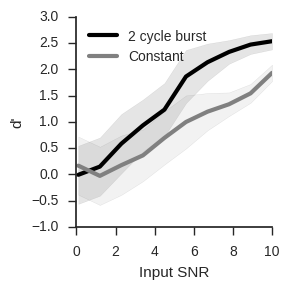

In [47]:
plt.figure(figsize=(3, 3))

r = b1['rates'] / 10.0  # 10 Hz is the noise level
M = b1['d_primes'].mean(0)
SD = b1['d_primes'].std(0)
SEM = SD / np.sqrt(len(SD))

plt.plot(r, M, color='black', linewidth=3, label='2 cycle burst')
plt.fill_between(r, M+SEM, M-SEM, facecolor='black', alpha=0.1)

r = b4['rates'] / 10.0
M = b4['d_primes'].mean(0)
SD = b4['d_primes'].std(0)
plt.plot(r, M, color='grey', linewidth=3, label="Constant")
plt.fill_between(r, M+SEM, M-SEM, facecolor='grey', alpha=0.1)

plt.xlabel("Input SNR")
plt.ylim(-1, 3)
plt.ylabel("d'")
plt.legend(loc='upper left', fancybox=True, framealpha=0.1)
plt.tight_layout()
sns.despine()

## Amplitude experiments

In [48]:
res = load_kdf("../data/fig4/4p.hdf5")

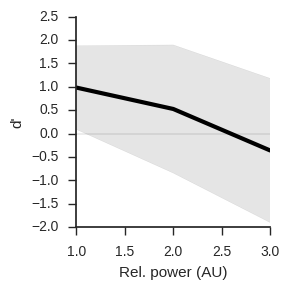

In [49]:
plt.figure(figsize=(3, 3))

p = res['powers2']
M = res['d_primes'].mean(0)
SD = res['d_primes'].std(0)
SEM = SD / np.sqrt(len(SD))

plt.plot(p, M, color='black', linewidth=3)
plt.fill_between(p, M+SEM, M-SEM, facecolor='black', alpha=0.1)
plt.xlabel("Rel. power (AU)")
plt.ylabel("d'")
plt.xlim(1, 3)
plt.axhline(y=0, color='k', linewidth=.1)
plt.tight_layout()
sns.despine()

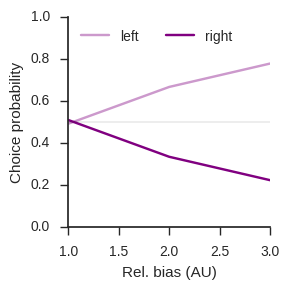

In [50]:
plt.figure(figsize=(3, 3))

p = res['powers2'] / res['pow1']
left = res['p_lefts'].mean(0)
right = res['p_rights'].mean(0)

plt.plot(p, left,  color='purple', alpha=0.4, label='left')
plt.plot(p, right, color='purple', alpha=1, label='right')
plt.legend(loc='upper left', ncol=2)
plt.xlabel("Rel. bias (AU)")
plt.ylabel("Choice probability")
plt.ylim(0, 1)
plt.xlim(1, 3)
plt.axhline(y=0.5, color='k', linewidth=.1)
plt.tight_layout()
sns.despine()